In [7]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [ ]:
''' 
Construct a scatterplot of the data.
Perform a residual analysis: check assumptions (linearity, homoscedasticity, normality, independence).
Determine if any outliers are present.
Find the regression equation.
Determine whether any observation is an influential point.
Obtain and interpret the coefficient of determination.
Determine and interpret the correlation coefficient (often not necessary).
Find and interpret the standard error of the estimate (standard deviation of the regression)

Conduct a t-test to determine whether home size is a useful predictor of home price.
Find and interpret a 95% confidence interval for the slope.

Estimate the mean price for a home of 1800 square feet and give a 95% confidence interval.
Estimate the price of a single 1800-square-foot home and give a 95% prediction interval.
Compare and discuss the CI vs. PI from (j) and (k).

'''



In [11]:
# Home size in square feet
size = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700,
                 1525, 1650, 1700, 1875, 1900, 1300, 1600, 2100, 2200, 1250])

# Price in $1,000s
price = np.array([245, 312, 279, 308, 199, 266, 412, 410, 255, 275,
                  268, 280, 300, 315, 325, 210, 285, 375, 390, 220])


In [12]:
size

array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700, 1525,
       1650, 1700, 1875, 1900, 1300, 1600, 2100, 2200, 1250])

In [13]:
price

array([245, 312, 279, 308, 199, 266, 412, 410, 255, 275, 268, 280, 300,
       315, 325, 210, 285, 375, 390, 220])

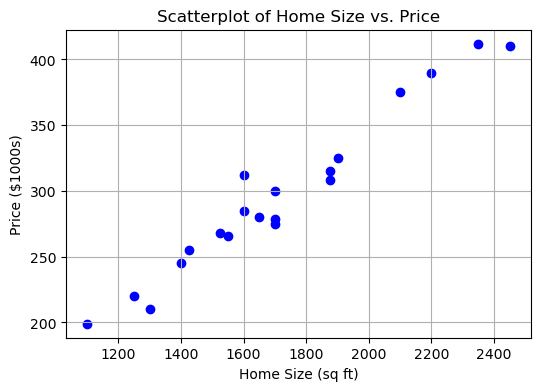

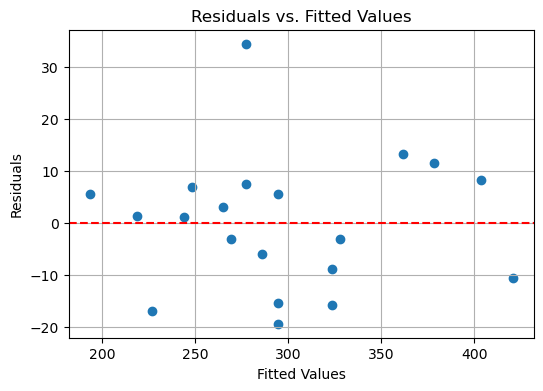

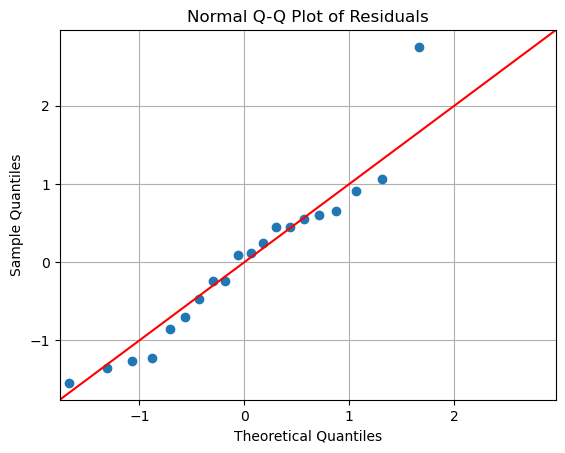

(0.9402760863304138, 0.2426781952381134, 2.3924945580941337)

In [14]:
# Prepare the data for regression
X = sm.add_constant(size)
model = sm.OLS(price, X).fit()
residuals = model.resid
fitted = model.fittedvalues

# Plot 1: Scatterplot
plt.figure(figsize=(6,4))
plt.scatter(size, price, color='blue')
plt.xlabel("Home Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Scatterplot of Home Size vs. Price")
plt.grid(True)
plt.show()

# Plot 2: Residuals vs Fitted
plt.figure(figsize=(6,4))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.show()

# Plot 3: Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Normal Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

# Shapiro-Wilk Test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)

# Durbin-Watson Test for independence
durbin_watson_stat = sm.stats.durbin_watson(residuals)

shapiro_stat, shapiro_p, durbin_watson_stat


In [15]:
# Fit the regression model again (already done, but repeating for clarity)
model = sm.OLS(price, sm.add_constant(size)).fit()

# Display regression coefficients
intercept = model.params[0]
slope = model.params[1]

# Regression equation: y = intercept + slope * x
intercept, slope


(8.100025438819785, 0.16837954718901038)

In [16]:
# Display the full regression summary with coefficients, t-tests, R-squared, etc.
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     399.2
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           9.79e-14
Time:                        17:52:52   Log-Likelihood:                -78.943
No. Observations:                  20   AIC:                             161.9
Df Residuals:                      18   BIC:                             163.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1000     14.730      0.550      0.589     -22.847      39.047
x1             0.1684      0.008     19.981      0.000       0.151       0.186
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   2.392
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                1.759
Skew:                           0.629   Prob(JB):                        0.415
Kurtosis:                       3.727   Cond. No.                     8.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

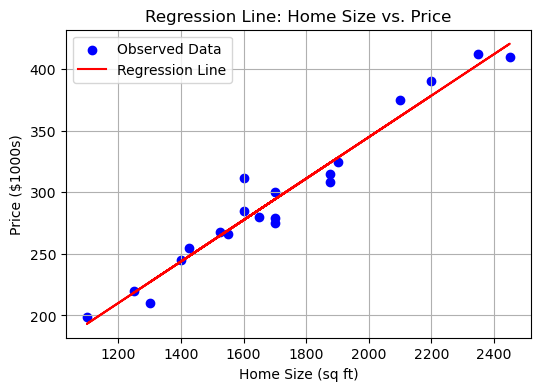

In [17]:
# Plot the regression line along with the scatterplot of the data
plt.figure(figsize=(6,4))
plt.scatter(size, price, color='blue', label="Observed Data")
plt.plot(size, model.fittedvalues, color='red', label="Regression Line")
plt.xlabel("Home Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Regression Line: Home Size vs. Price")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Compute and display the standard error of the estimate (residual standard deviation)
standard_error = np.sqrt(np.sum(residuals**2) / model.df_resid)
standard_error


13.208658928155693

In [21]:
# Fix: Access slope confidence interval from the array using index instead of .loc
slope_conf_int = model.conf_int()[1]  # 95% confidence interval for slope (row 1)

slope_t_stat, slope_p_value, slope_conf_int


(19.981226452480787, 9.789659527754244e-14, array([0.15067531, 0.18608378]))

In [24]:
# Estimate the mean price for a home of 1800 square feet
# Construct a 95% confidence interval for that mean

# Ensure new data frame columns align with original model design matrix
new_X = pd.DataFrame({"const": [1], "x1": [home_size]})
new_X.columns = ["const", size.dtype.name]  

# Recreate the design matrix for model to align columns
X = sm.add_constant(size)
model = sm.OLS(price, X).fit()

# Predict and extract CI for mean response
prediction = model.get_prediction(new_X)
summary_frame = prediction.summary_frame(alpha=0.05)

mean_estimate = summary_frame["mean"].values[0]
mean_ci_lower = summary_frame["mean_ci_lower"].values[0]
mean_ci_upper = summary_frame["mean_ci_upper"].values[0]

mean_estimate, mean_ci_lower, mean_ci_upper


(311.1832103790385, 304.787594259222, 317.578826498855)

In [25]:
# Estimate the price of a single 1800-square-foot home and give a 95% prediction interval
# Extract the prediction interval for an individual home of 1800 sq ft
pred_ci_lower = summary_frame["obs_ci_lower"].values[0]
pred_ci_upper = summary_frame["obs_ci_upper"].values[0]

pred_ci_lower, pred_ci_upper


(282.70538508380207, 339.6610356742749)